# Kaggle数据挖掘竞赛项目—泰坦尼克号生还者预测

- 项目介绍
项目发起：本项目由 Kaggle 发起，目的是对泰坦尼克号失事的乘客进行生还概率的预测分析，详细链接参考：泰坦尼克号生还者预测。
数据源：由 Kaggle 提供，分别有训练集train.csv 和 测试集test.csv，具体的特征含义将在下面进行说明。
难度系数：项目难度适中，对于初学者有一定挑战性，非常适合初始学习。
-  数据分析及挖掘过程
数据探索： 清楚了解各个特征的数据类型，链接：如何区别各种数据类型？
数据处理： 熟练Python基本操作，以及Pandas，Numpy的使用；
数据可视化： 可视化工具matplotlib，seaborn的使用；
机器学习模型： 掌握sklearn的使用；
- 特征定义
  - PassengerId： 乘客ID
  - Pclass： 乘客等级(1/2/3等舱位)
  - Name： 乘客姓名
  - Sex： 性别
  - Age： 年龄
  - SibSp： 堂兄弟/妹个数
  - Parch： 父母与小孩个数
  - Ticket： 船票信息
  - Fare： 票价
  - Cabin： 客舱
  - Embarked： 登船港口
目标信息：
Survived: 生还

# 1、数据的认识与探索

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from pylab import mpl
#train为训练集（模型训练用），test为测试集（给训练好的模型测试用）
data_train=pd.read_csv('E:/train.csv')
data_test=pd.read_csv('E:/test.csv')

#将目标变量Survived单独提取，从特征变量中一处目标变量Survived
df_target=data_train['Survived']
data_train_feature=data_train.drop('Survived',axis=1)
#合并train和test数据集，以方便数据处理对两个数据集同时处理
#append()默认列对齐
df=data_train.append(data_test)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


我们可以看到Fare,Cabin,Embarked 有缺失，其中Embarked缺失严重，我们进一步看看缺失值的情况

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
pd.isnull(df).sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

可以清楚的看到缺失值以及缺失值的数量：Age,Cabin,embarked,Fare四个特征值有缺失值，其中Cabin缺失最严重

In [26]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


异常值初始观察（主要观察一下最大与最小值）：
（1）Fare：船票价格平均值33.2，中位数14，平均值比中位数大很多，说明该特征分布是严重的右偏，又看到最大值512，所以512很可能是隐患的异常值。
（2）Age：最小值为0.17，最大值为80，0.17是大概刚出生一个半月的意思，而80年龄有些过大。
（3）SibSp与Parch：Sibsp最大为8，可能是异常，但又看到Parch最大值为9。这两个特征同时出现大的数值，说明了这个数值是有可能的，我们进步一观察。

# 结论： 通过以上观察和分析，我们看到了一些可能的异常值，但是也不敢肯定。这需要我们进一步通过可视化来清楚的显示并结合对业务的理解来确定。

判断这些特征都是什么数据类型？定性？定序？定距？还是定比？，弄清楚这一步主要是为了后续正确找对方法进行可视化

# 2、数据可视化探索

通过可视化可以 (1)可以发现事实问题，并寻找出现的原因 - (2)更清晰的了解特征对目标变量的影响，有助于特征工程; - (3)可以发现不易发现的特征异常值;

# 定类/定序特征分析

数据中属于定类的特征：Name、Sex、Ticket、Cabin、Embarked
          定序的特征：Pclass、SibSp、Parch

In [44]:
cat_list = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for n,i in enumerate(cat_list):  
    Cabin_cat_num = df[i].value_counts().index.shape[0]
    print('{0}. {1}特征的类型数量是: {2}'.format(n+1,i,Cabin_cat_num))

1. Pclass特征的类型数量是: 3
2. Name特征的类型数量是: 1307
3. Sex特征的类型数量是: 2
4. SibSp特征的类型数量是: 7
5. Embarked特征的类型数量是: 3
6. Parch特征的类型数量是: 8
7. Ticket特征的类型数量是: 929
8. Cabin特征的类型数量是: 186


结论：从上面各特征值的类型数量来看： - 一些比较少数量的特征如Pclass，Sex，SibSp，Embarked，Parch等可进行可视化分析。 - 剩下特征如Name（每个人名字都不一样），或者Ticket和Cabin由于分类太多对于可视化不是太方便，因此，先对上面5种容易的分类进的特征行可视化，而对于Name，Ticket，Cabin等到后续进行进一步分析。


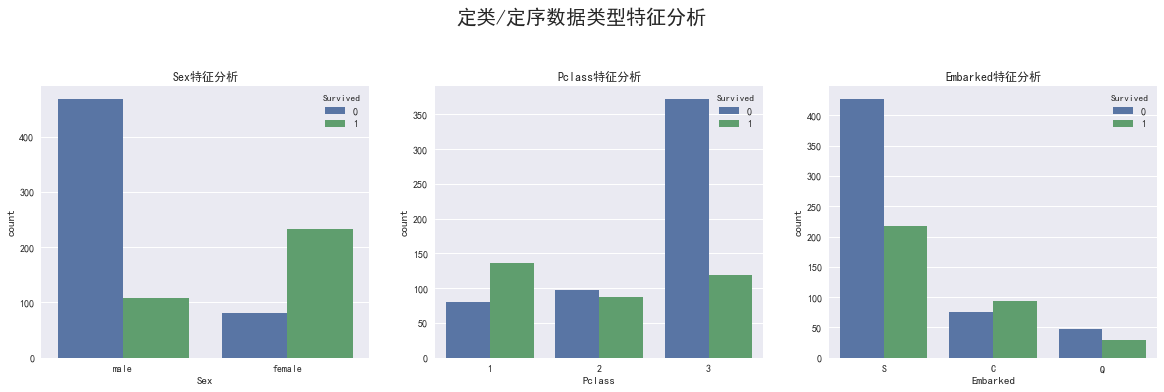

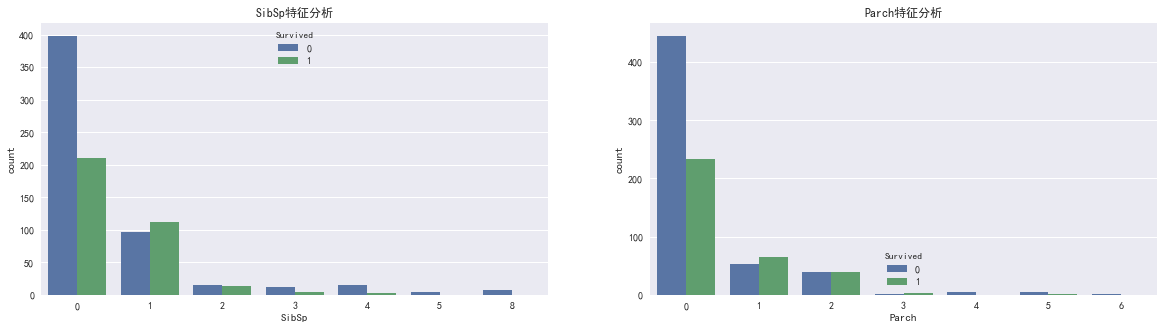

In [22]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
f, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Sex特征分析')
ax2.set_title('Pclass特征分析')
ax3.set_title('Embarked特征分析')
f.suptitle('定类/定序数据类型特征分析',size=20,y=1.1)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp特征分析')
ax2.set_title('Parch特征分析')
plt.show()

从以上的结果我们可以观察到各特征值的分布情况，以及与目标变量之间的联系：
  （1）Sex：男性的总人数明显多于女性，但获救的概率很低，而女性获救概率比较高
  （2）Pclass:3等舱的人数最多（也就是说大多数都是普通老百姓），但是获救概率很低，1,2等舱的获救概率比较高
  （3）Embarked：登录港口S数量最多，但是获救概率也是最低的，C港口的获救概率是最高的
  （4）SbiSp：兄弟姐妹为0的人数最多，但是获救率很低，1和2的或戒律相对较高。
  （5）Paech：显示情况同SbiSp
就以上的5个特征来看，Sex和Pclass两个特征值影响较大。

以上只是单独特征对是否生还的简单分析，但实际上是对目标变量的影响是由多个因素造成的，而不是单独的影响，因此，我们需要知道某个特定条件下的特征影响才能更加帮助我们分析。

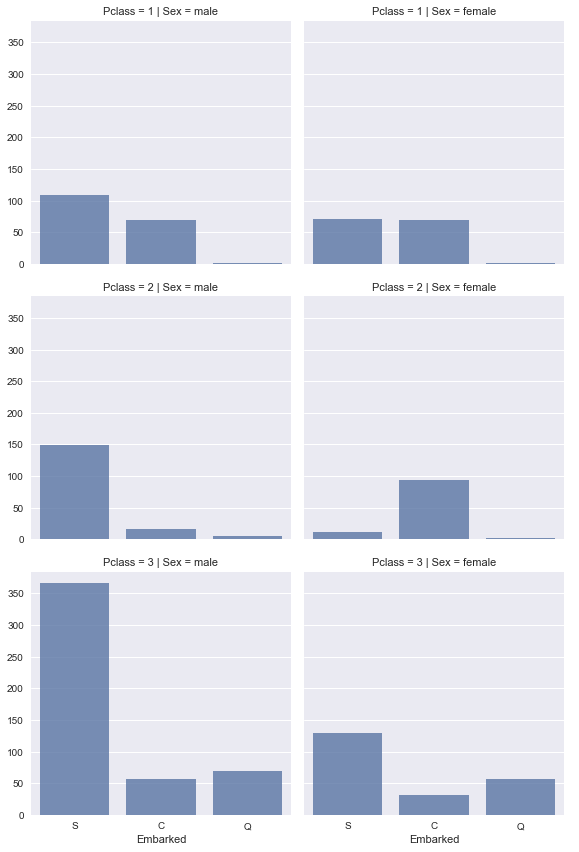

In [10]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

以上便是在不同等级下，男女在不同港口登录的数量比，由显示结果可以看到，Pclass为1和2的时候，Q港口数量几乎为零，而Pclass3的Q港口人数甚至比C港口多。这说明社会等级与港口有关联，根据社会等级与港口的对应关系可推测S和C港口为高级港口，而Q港口为普通港口。 - Pclass为2的港口中，男性与女性在S和C港口的数量分布呈现相反趋势，与其他Pclass等级截然不同，这说明Pclass2可能是社会中某个共性群体，这个群体多为女性，而男性很少。既然多为女性，且女性生还概率还大，可推测Pclass2的C港口的生还概率也很高

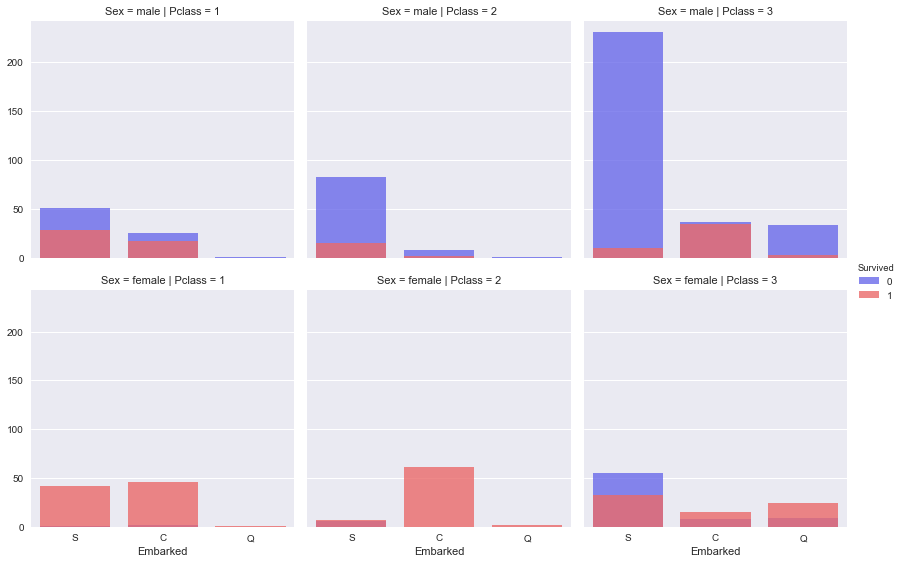

In [14]:
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()
plt.show()

以上可以看到不同等级，不同性别在不同港口各自的生还数量的比例。

# 定距/定比特征分析

特征中属于定距的特征有：无；属于定比的特征有：Age,Fare

（1）Age分布和特征分析

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


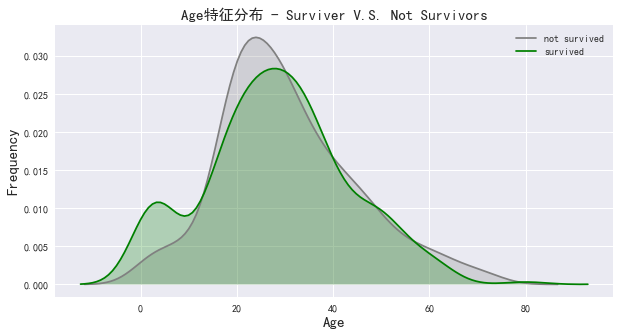

In [7]:
sns.set_style({'font.sans-serif':['simhei','Arial']}) #正常显示中文
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(data_train.loc[(data_train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
sns.kdeplot(data_train.loc[(data_train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age特征分布 - Surviver V.S. Not Survivors', fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

很明显可以看到，0-15岁这个范围，获救的概率大于没有获救的，也及时说小孩的获救概率大。

接下来来看看不同等级舱那个年龄段的人比较多,采用箱线图+有分布趋势的散点图来分析

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


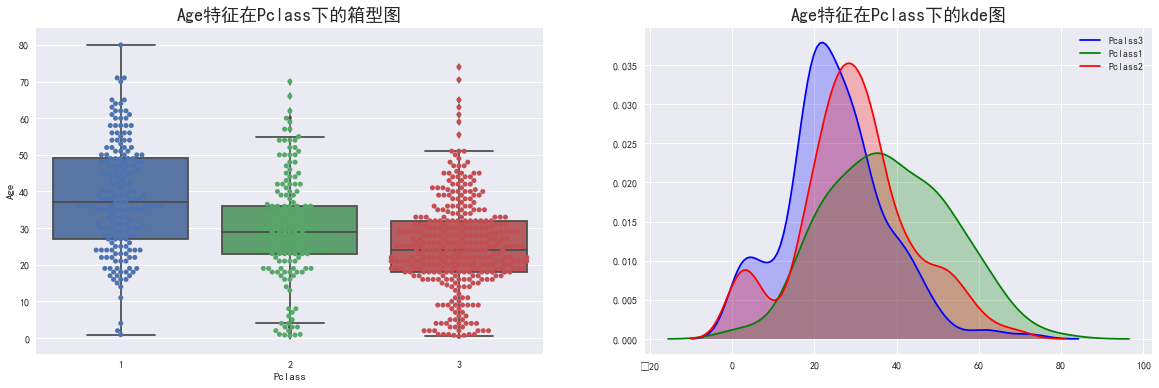

In [42]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Age", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Age'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Age'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Age'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Age特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Age特征在Pclass下的kde图", fontsize = 18)
plt.show()

可以看到1等舱的年龄偏大，也就是说到了一定年龄才有雄厚的经济基础，3等舱的的年龄最小，也就是说3等舱中大多数是年轻人。

那我们接下来看一下Sex，Pclass分类条件下，Age年龄对Survived的散点图

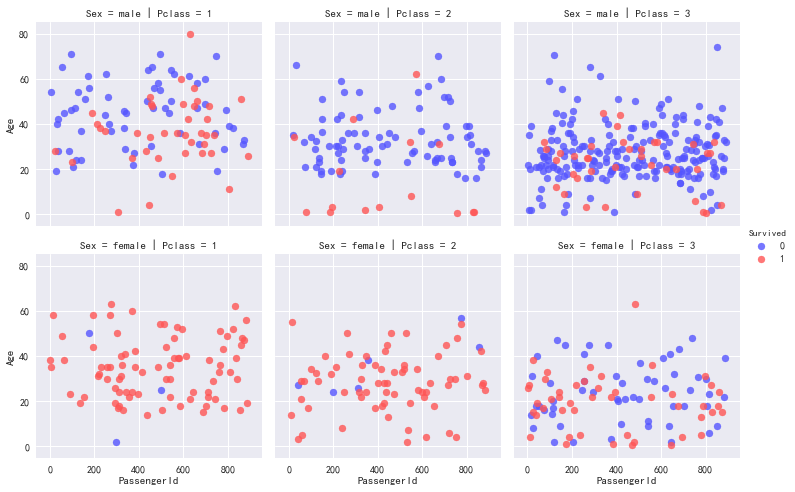

In [18]:
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()
plt.show()

从散点图来分析：  Pclass1和Pclass2的女性几乎都是Survived的，Pclass3中女性Survived则不是很明显了。 Pclass1的男性生还率最高，Pclass2和Pclass3的生还率比较低，但是Pclass2中年龄小的乘客几乎全部生存。印证了那么原则：妇女和孩子优先营救。

In [ ]:
我们再来看一下Sex,Embarked分类条件下的Age对Survived的散点图

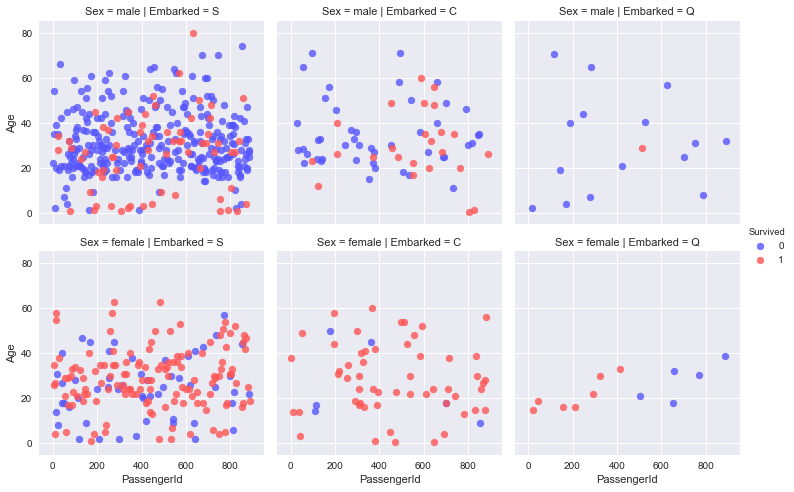

In [4]:
grid = sns.FacetGrid(data_train, row='Sex', col='Embarked', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()
plt.show()

图中可以看到S港登记的大部分男性都没有获救，女性获救得较多，同时三个港口的女性获救相对来说都比较多

（2）Fare分布和特征分析

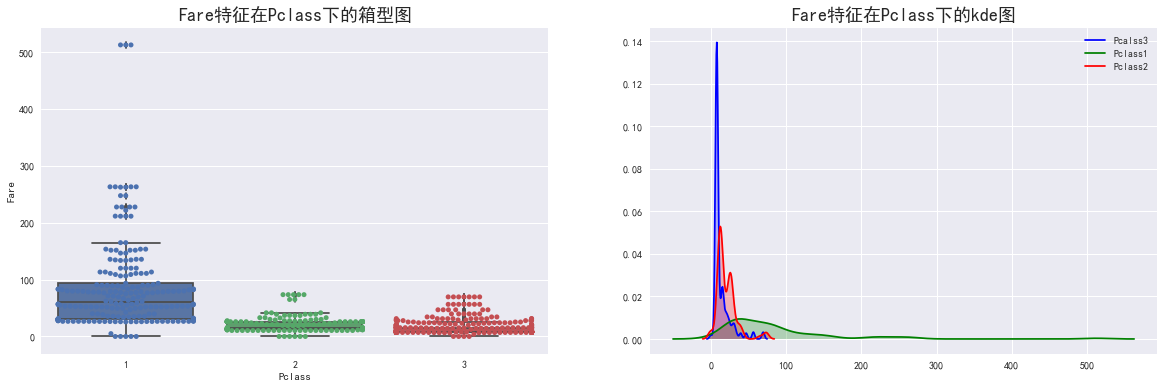

In [19]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Fare'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Fare'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Fare'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Fare特征在Pclass下的箱型图', fontsize = 18)
ax2.set_title("Fare特征在Pclass下的kde图", fontsize = 18)
plt.show()

观察到Pclass相对于2和3比较高，但Pclass1中有几个大于500的异常值，那我们看一下这些异常值

In [22]:
data_train.loc[data_train['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


可以看到这三个人的Pclass,Ticket,Fare,Survived，Embarked都一模一样，有可能三个人是认识的，不是异常值，后面我们在进行特征工程时特殊对待

Sex和Pclass情况下Fare和Age的散点图

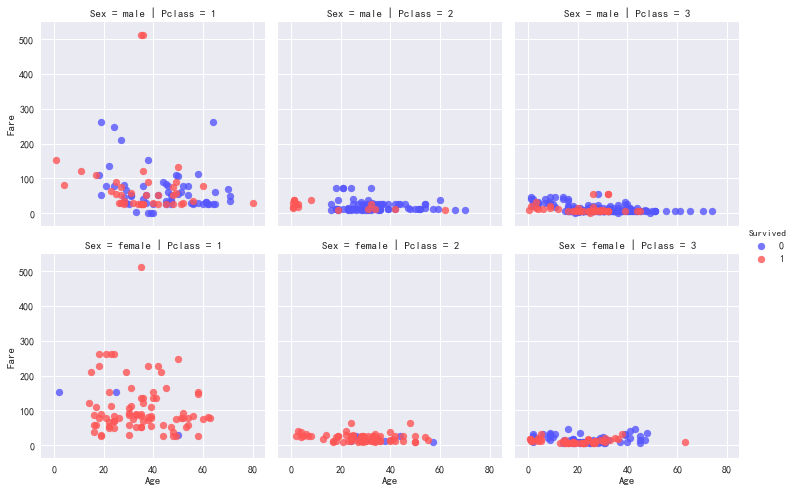

In [30]:
grid = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', palette='seismic', size=3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha=0.8)
grid.add_legend()
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


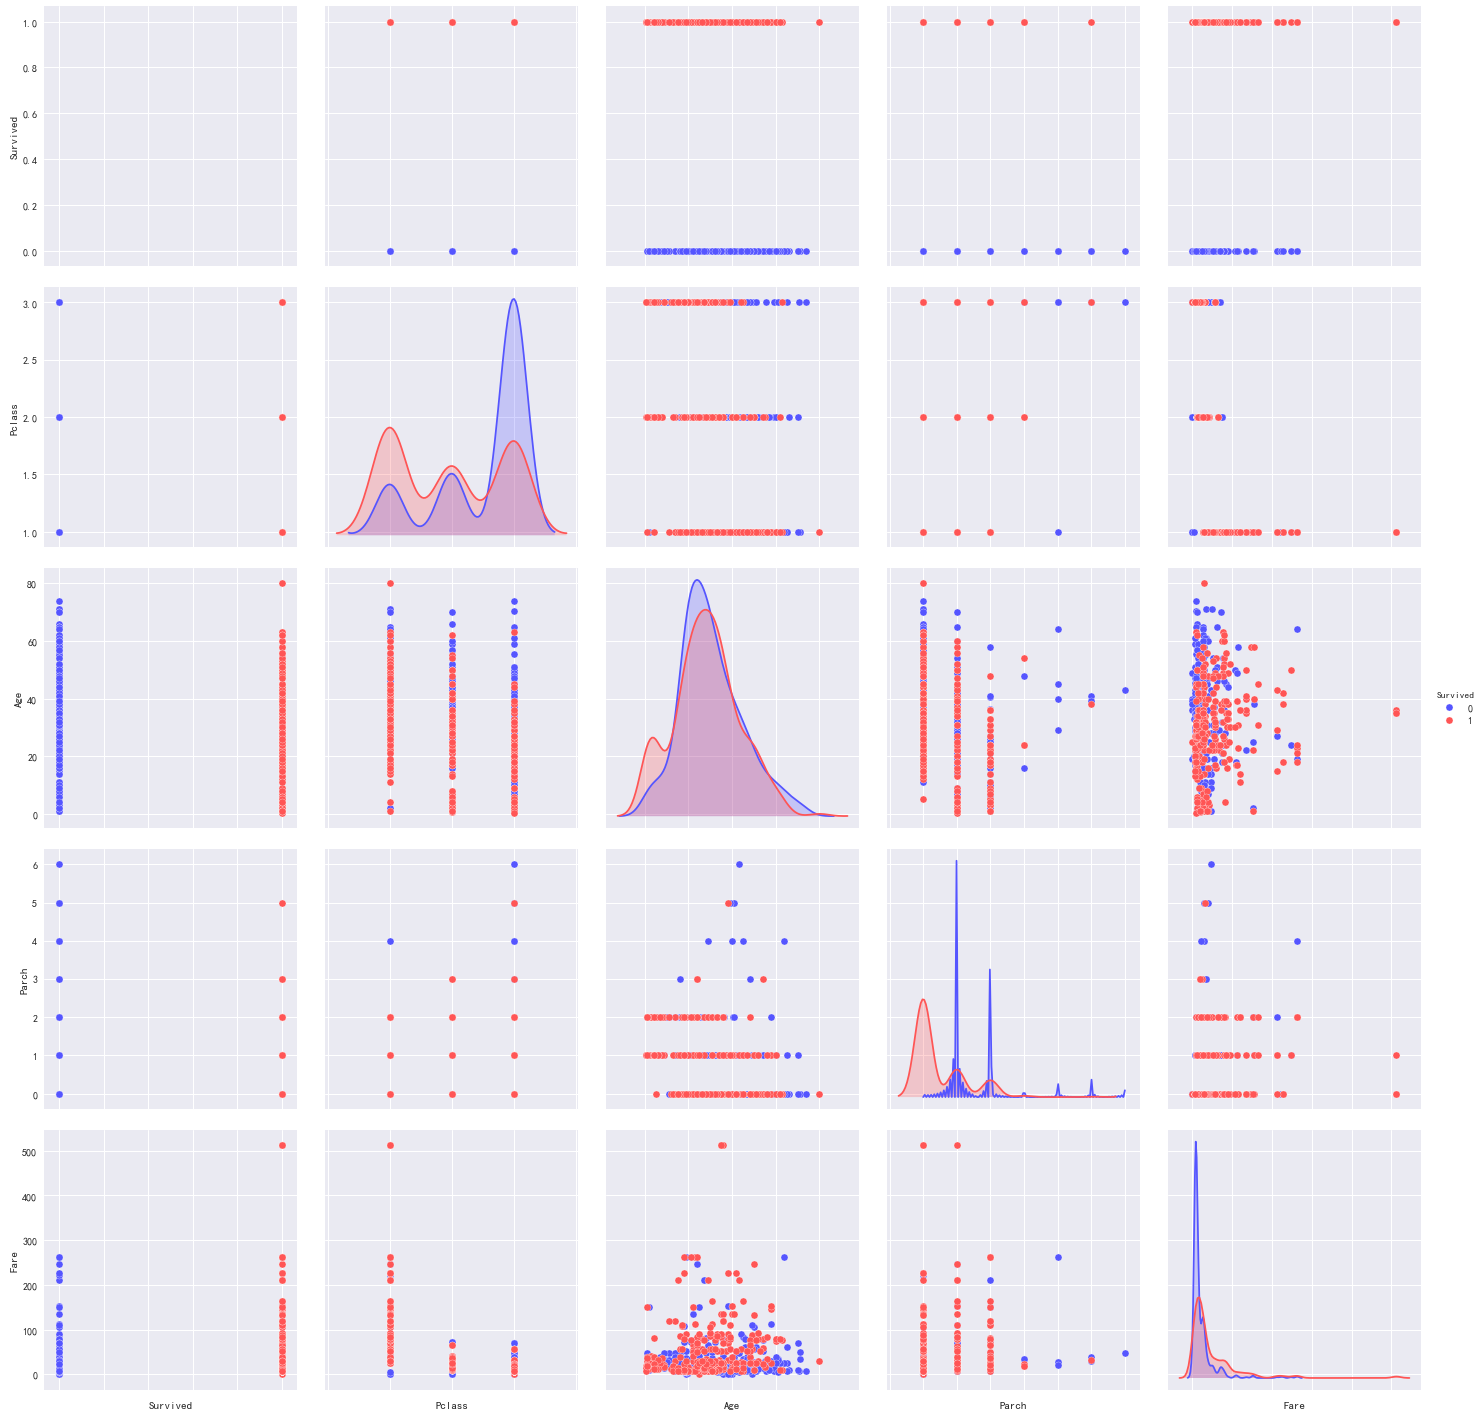

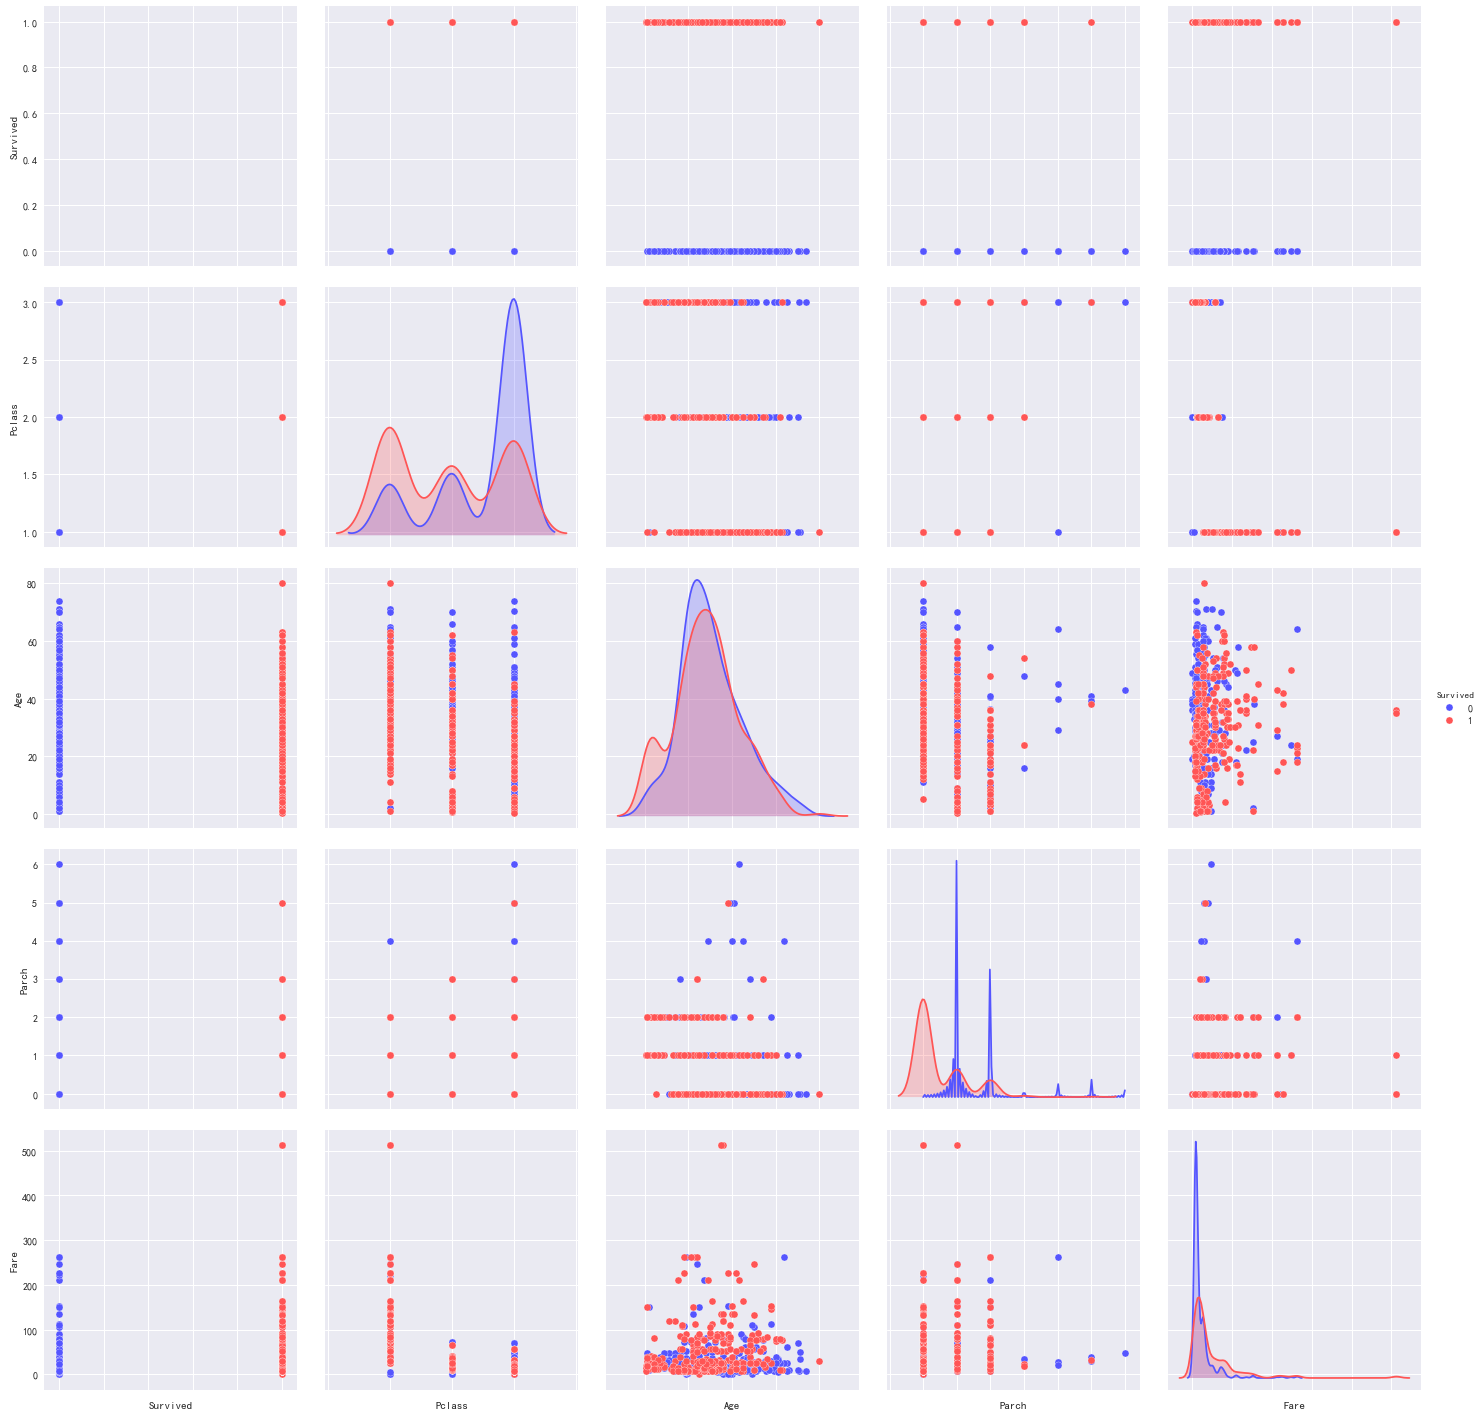

In [29]:
g = sns.pairplot(data_train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic',
                 size=4,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=50) )
g.set(xticklabels=[])
plt.show()

这是上述7个特征的相互关联图的汇总，对角线为特征自身的kde分布

# 缺失值处理

Fare缺失值处理

In [3]:
df[df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


关于Fare特征的缺失值只有一个，3等舱，年龄大于60岁，为男性，这个时候我们可以使用相似特征替换方法来填补失值，下面找一下与缺失值具有相似特征的其他样本数据：

In [7]:
df.loc[(df['Pclass']==3)&(df['Age']>60)&(df['Sex']=='male')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


找到了与之匹配的几位其他乘客，我们就用这几位乘客的Fare的平均值进行填补其缺失值

In [6]:
fare_mean_estimated = df.loc[(df['Pclass']==3)&(df['Age']>60)&(df['Sex']=='male')].Fare.mean()
df.loc[df['PassengerId']==1044,'Fare']=fare_mean_estimated

Embarked缺失值

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked有两个缺失值,Pclass为1且为女性，根据前面可视化分析可知，这样的分类下，C港口的人数是最多的，所以我们选择用C港口进行补充

In [7]:
df['Embarked']=df['Embarked'].fillna('C')

Cabin特征缺失值：Cain特征缺失很严重，如果进行大量的填补会引入更多噪声。因为缺失值也是一种值，这里将Cabin是否为缺失值作为一个新的特征来处理，即衍生出一个新的特征CabinCat

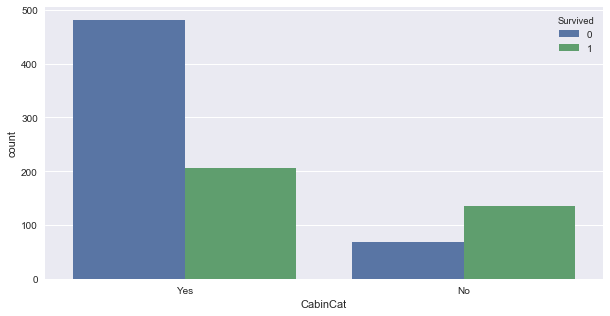

In [5]:
data_train['CabinCat']=data_train['Cabin'].copy()
data_train.loc[(data_train.CabinCat.notnull()),'CabinCat']='No'
data_train.loc[ (data_train.CabinCat.isnull()), 'CabinCat' ] = "Yes"
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x='CabinCat',hue='Survived',data=data_train)
plt.show()

不缺失的生还率明显高于缺失的生还率

Age特征缺失值较多，大量删除会减少样本信息，这里利用其他特征进行预测填补Age,比如三等舱年龄会偏小，而一等舱年龄会偏大,会在后续进行处理

# 衍生变量

Name特征值分析

In [8]:
import re
#从name中提取Title信息，因为同为男性，Mr和Master的生还率是不一样的
df["Title"] = df["Name"].apply(lambda x: re.search(' ([A-Za-z]+)\.',x).group(1))
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Dona          1
Lady          1
Countess      1
Sir           1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [18]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 2, "Mme": 3,"Don": 9,"Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

In [19]:
df["TitleCat"] = df.loc[:,'Title'].map(title_mapping)

In [9]:
# SibSp和Parch特征进行组合
df['FamilySize']=df["SibSp"] + df["Parch"] + 1
#根据FamilySize分布进行分箱
df["FamilySize"] = pd.cut(df["FamilySize"], bins=[0,1,4,20], labels=[0,1,2])
#从Name中衍生出Name的长度
df["NameLength"] = df["Name"].apply(lambda x: len(x))
# 量化Embarked特征
df["Embarked"] = pd.Categorical.from_array(df.Embarked).codes
df.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,NameLength
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,23
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,51
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,22
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,44
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,24


In [10]:
# 对Sex特征进行独热编码分组
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,NameLength,female,male
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,23,0,1
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,51,1,0
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,22,1,0
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,44,1,0
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,24,0,1


In [11]:
df['CabinCat'] = df['Cabin'].copy()
df.loc[ (df.CabinCat.notnull()), 'CabinCat' ] = "No"
df.loc[ (df.CabinCat.isnull()), 'CabinCat' ] = "Yes"
cabin_map ={'Yes':1,'No':0}
df['CabinCat'] = df['CabinCat'].map(cabin_map)
df['CabinCat'].head()

0    1
1    0
2    1
3    0
4    1
Name: CabinCat, dtype: int64

- Title：从Name中提取Title信息，因为同为男性，Mr.和 Master.的生还率是不一样的；
- TitleCat：映射并量化Title信息，虽然这个特征可能会与Sex有共线性，但是我们先衍生出来，后进行筛选；
- FamilySize：可视化分析部分看到SibSp和Parch分布相似，固将SibSp和Parch特征进行组合；
- NameLength：从Name特征衍生出Name的长度，因为有的国家名字越短代表越显贵；
- CabinCat：是否有Cabin信息；

衍生信息

In [12]:
#妇女/儿童   男士标签
child_age=18
def get_person(passenger):
    age,sex=passenger
    if(age<child_age):
        return 'child'
    elif(sex=='female'):
        return  'female_adult'
    else:
        return  'male_adult'
df = pd.concat([df, pd.DataFrame(df[['Age', 'Sex']].apply(get_person,axis=1), columns=['person'])],axis=1)
#对person标签进行独立编码，child,female_adult,male_adult
df = pd.concat([df,pd.get_dummies(df['person'])],axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title,FamilySize,NameLength,female,male,CabinCat,person,child,female_adult,male_adult
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,Mr,1,23,0,1,1,male_adult,0,0,1
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,Mrs,1,51,1,0,0,female_adult,0,1,0
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,Miss,0,22,1,0,1,female_adult,0,1,0
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,Mrs,1,44,1,0,0,female_adult,0,1,0
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,Mr,0,24,0,1,1,male_adult,0,0,1


In [13]:
#cabin基偶性的衍生特性
def get_type_cabine(cabine):
    cabine_search = re.search('(\d+)', cabine)
    if cabine_search:
        num = cabine_search.group(0)
        if np.float64(num) % 2 == 0:
            return '2'
        else:
            return '1'
    else:
        return '0'

df['Cabin'] = df['Cabin'].fillna(' ')
df['CabinType'] = df['Cabin'].apply(get_type_cabine)
df["CabinType"].value_counts()

0    1020
2     154
1     135
Name: CabinType, dtype: int64

下面是基于Ticket衍生出几个高级特征变量，其含义：如果几个人又有相同的Ticket号码，那么意味着他们是一个小群体，而又因为女性男性的生还概率存在差异，所以将分别衍生出几个任务标签的特征，即分群体情况下的男女生还特征

In [14]:
# ticket的衍生特征
table_ticket = pd.DataFrame(df["Ticket"].value_counts())
table_ticket.rename(columns={'Ticket':'Ticket_Numbers'}, inplace=True)
table_ticket['Ticket_dead_women'] = df.Ticket[(df.female_adult == 1.0) 
                                    & (df.Survived == 0.0) 
                                    & ((df.Parch > 0) | (df.SibSp > 0))].value_counts()

table_ticket['Ticket_dead_women'] = table_ticket['Ticket_dead_women'].fillna(0)
table_ticket['Ticket_dead_women'][table_ticket['Ticket_dead_women'] > 0] = 1.0

table_ticket['Ticket_surviving_men'] = df.Ticket[(df.male_adult == 1.0) 
                                    & (df.Survived == 1.0) 
                                    & ((df.Parch > 0) | (df.SibSp > 0))].value_counts()

table_ticket['Ticket_surviving_men'] = table_ticket['Ticket_surviving_men'].fillna(0)
table_ticket['Ticket_surviving_men'][table_ticket['Ticket_surviving_men'] > 0] = 1.0 

# Ticket特征量化
table_ticket["Ticket_Id"] = pd.Categorical.from_array(table_ticket.index).codes

table_ticket["Ticket_Id"][table_ticket["Ticket_Numbers"] < 3 ] = -1
# Ticket数量分箱
table_ticket["Ticket_Numbers"] = pd.cut(table_ticket["Ticket_Numbers"], bins=[0,1,4,20], labels=[0,1,2])

df = pd.merge(df, table_ticket, left_on="Ticket",right_index=True, how='left', sort=False)
df.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,CabinCat,person,child,female_adult,male_adult,CabinType,Ticket_Numbers,Ticket_dead_women,Ticket_surviving_men,Ticket_Id
0,22.0,,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,male_adult,0,0,1,0,0,0.0,0.0,-1
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,0,female_adult,0,1,0,1,1,0.0,0.0,-1
2,26.0,,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,female_adult,0,1,0,0,0,0.0,0.0,-1
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,0,female_adult,0,1,0,1,1,0.0,0.0,-1
4,35.0,,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,1,male_adult,0,0,1,0,0,0.0,0.0,-1


In [15]:
df['surname'] = df["Name"].apply(lambda x: x.split(',')[0].lower())

In [26]:
# surname衍生特征
table_surname = pd.DataFrame(df["surname"].value_counts())
table_surname.rename(columns={'surname':'Surname_Numbers'}, inplace=True)

table_surname['Surname_dead_women'] = df.surname[(df.female_adult == 1.0) 
                                    & (df.Survived == 0.0) 
                                    & ((df.Parch > 0) | (df.SibSp > 0))].value_counts()
table_surname['Surname_dead_women'] = table_surname['Surname_dead_women'].fillna(0)
table_surname['Surname_dead_women'][table_surname['Surname_dead_women'] > 0] = 1.0 

table_surname['Surname_surviving_men'] = df.surname[(df.male_adult == 1.0) 
                                    & (df.Survived == 1.0) 
                                    & ((df.Parch > 0) | (df.SibSp > 0))].value_counts()
table_surname['Surname_surviving_men'] = table_surname['Surname_surviving_men'].fillna(0)
table_surname['Surname_surviving_men'][table_surname['Surname_surviving_men'] > 0] = 1.0 

table_surname["Surname_Id"]= pd.Categorical.from_array(table_surname.index).codes

# surname数量分箱
table_surname["Surname_Id"][table_surname["Surname_Numbers"] < 3 ] = -1

table_surname["Surname_Numbers"] = pd.cut(table_surname["Surname_Numbers"], bins=[0,1,4,20], labels=[0,1,2])

df = pd.merge(df, table_surname, left_on="surname",right_index=True,how='left', sort=False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [21]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'TitleCat',
       'female', 'male', 'CabinCat', 'female', 'male', 'person', 'child',
       'female_adult', 'male_adult', 'CabinType', 'Ticket_Numbers',
       'Ticket_dead_women', 'Ticket_surviving_men', 'Ticket_Id', 'surname',
       'Surname_Numbers', 'Surname_dead_women', 'Surname_surviving_men',
       'Surname_Id'],
      dtype='object')

Age缺失值处理

前面说了将采用拟合的方法来填补Age缺失值，那为什么放在最后处理呢：
- 其他特征还存在缺失值，放入拟合模型影响预测效果
- 特征还没有量化，无法输入模型

因为上面已经将所提问题解决，所以可以开始拟合Age缺失值，这部分是用随机森林ExtraTreesRegressor模型进行拟合。

In [20]:
#Random Forest分类和回归的实现：RandomForestClassifier和RandomForestRegression，ExtraTreesRegressor解决回归，另一个解决分类
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
#因为agey用的回归模型，所以选取可用于回归模型的特征进行预测填补
classers = ['Fare','Parch','Pclass','SibSp','TitleCat', 
            'CabinCat','female','male', 'Embarked', 'FamilySize', 'NameLength','Ticket_Numbers','Ticket_Id']
etr=ExtraTreesRegressor(n_estimators=200,random_state=0)
x_train=df[classers][df['Age'].notnull()]
x_test=df[classers][df['Age'].isnull()]
y_train=df['Age'][df['Age'].notnull()]
#转化为矩阵
x_train.as_matrix()

array([[7.25, 0, 3, ..., 23, 0, -1],
       [71.2833, 0, 1, ..., 51, 1, -1],
       [7.925, 0, 3, ..., 22, 0, -1],
       ...,
       [7.775, 0, 3, ..., 30, 0, -1],
       [108.9, 0, 1, ..., 28, 1, 834],
       [7.25, 0, 3, ..., 28, 0, -1]], dtype=object)

In [21]:
#np.flatten() 和 np.ravel() 都是用来将多维的array 变成一维(按行），
#它们之间的不同在于ravel（）函数是原array的引用，而flatten()返回的是原array的copy
np.ravel(y_train)

array([22. , 38. , 26. , ..., 28. , 39. , 38.5])

In [22]:
#与模型进行拟合
etr.fit(x_train.as_matrix(),np.ravel(y_train))
#预测age的值
age_preds = etr.predict(x_test.as_matrix())
#预测值填补缺失值
df['Age'][df['Age'].isnull()] = age_preds

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 特征选择

- 过滤法--方差分析：这里特征采用ANOVA方差分析F值来对各个特征变量打分：各个特征变量对目标变量的影响权重。

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
target=data_train['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [24]:
target=data_train['Survived'].values

In [27]:
features= ['Age', 'Embarked', 'Fare', 'Parch','female','male',
           'Pclass', 'SibSp','TitleCat', 'FamilySize', 'NameLength','CabinCat',
           'child', 'female_adult', 'male_adult', 'CabinType','Ticket_Numbers', 'Ticket_dead_women',
           'Ticket_surviving_men','Ticket_Id','Surname_Numbers','Surname_dead_women','Surname_surviving_men',
           'Surname_Id']
train=df[0:891].copy()
test=df[891:].copy()
#K的含义是保留k个最高分特征值
#参考博文：https://blog.csdn.net/stranger_man/article/details/78383689
#返回的是包含scores, pvalues(数理统计里面的p-value的概念)的两个数组，可以通过selector.pvalues_或者selector.scores_访问
selector = SelectKBest(f_classif, k=len(features))
selector.fit(train[features], target)
print(selector.pvalues_)

D:\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


[2.09526032e-02 1.67197343e-07 6.12018934e-15 1.47992454e-02
 1.40606613e-69 1.40606613e-69 2.53704739e-25 2.92243929e-01
 5.98846453e-27 1.16353136e-03 2.02679507e-24 3.09089104e-22
 2.54797678e-04 5.91864666e-54 1.25964787e-65 5.25591038e-17
 5.40997988e-06 2.90759911e-14 9.97493193e-18 8.51268686e-02
 1.85512357e-01 4.35850359e-11 9.14627508e-14 8.30730013e-01]


In [50]:
scores = -np.log10(selector.pvalues_)#也可以selector.scores来得到
#参考博文：https://www.cnblogs.com/yyxf1413/p/6253995.html
#将scores中的元素按从小到大排列，提取其对应的index(索引)，然后输出。
#[::1]则是从最后一个元素到第一个元素复制一遍。所以你得到的是一个倒序的，也就是从大到小的值对应的索引。
indices = np.argsort(scores)[::-1]
print("Features importance :")
for f in range(len(scores)):
    print("%0.2f %s" % (scores[indices[f]],features[indices[f]]))

Features importance :
68.85 male
68.85 female
64.90 male_adult
53.23 female_adult
26.22 TitleCat
24.60 Pclass
23.69 NameLength
21.51 CabinCat
17.00 Ticket_surviving_men
16.28 CabinType
14.21 Fare
13.54 Ticket_dead_women
13.04 Surname_surviving_men
10.36 Surname_dead_women
6.78 Embarked
5.27 Ticket_Numbers
3.59 child
2.93 FamilySize
1.83 Parch
1.68 Age
1.07 Ticket_Id
0.73 Surname_Numbers
0.53 SibSp
0.08 Surname_Id


In [ ]:
补充一个例子帮助理解上述代码：

In [33]:
import numpy as np
x=np.array([1,4,3,-1,6,9])
print(np.argsort(x))
indices=np.argsort(x)[::-1]
print (indices)
for f in range(6):
    print (indices[f])

[3 0 2 1 4 5]
[5 4 1 2 0 3]
5
4
1
2
0
3


这里分数越高代表特征权重越大。

特征相关性分析

  除了对特征权重选择外，我们也要分析特征相关性来筛选特征。相关性大的特征容易造成过拟合的现象，因此需要去除，最好的情况就是所有的特征相关性很低，各自的方差或者说信息量很高。
  接下来使用heatmap来展示特征相关性

In [51]:
features_selected = []
for i in range(len(scores)):
    if scores[indices[i]] >=2.5 :
        features_selected.append(features[indices[i]])
features_selected

['male',
 'female',
 'male_adult',
 'female_adult',
 'TitleCat',
 'Pclass',
 'NameLength',
 'CabinCat',
 'Ticket_surviving_men',
 'CabinType',
 'Fare',
 'Ticket_dead_women',
 'Surname_surviving_men',
 'Surname_dead_women',
 'Embarked',
 'Ticket_Numbers',
 'child',
 'FamilySize']

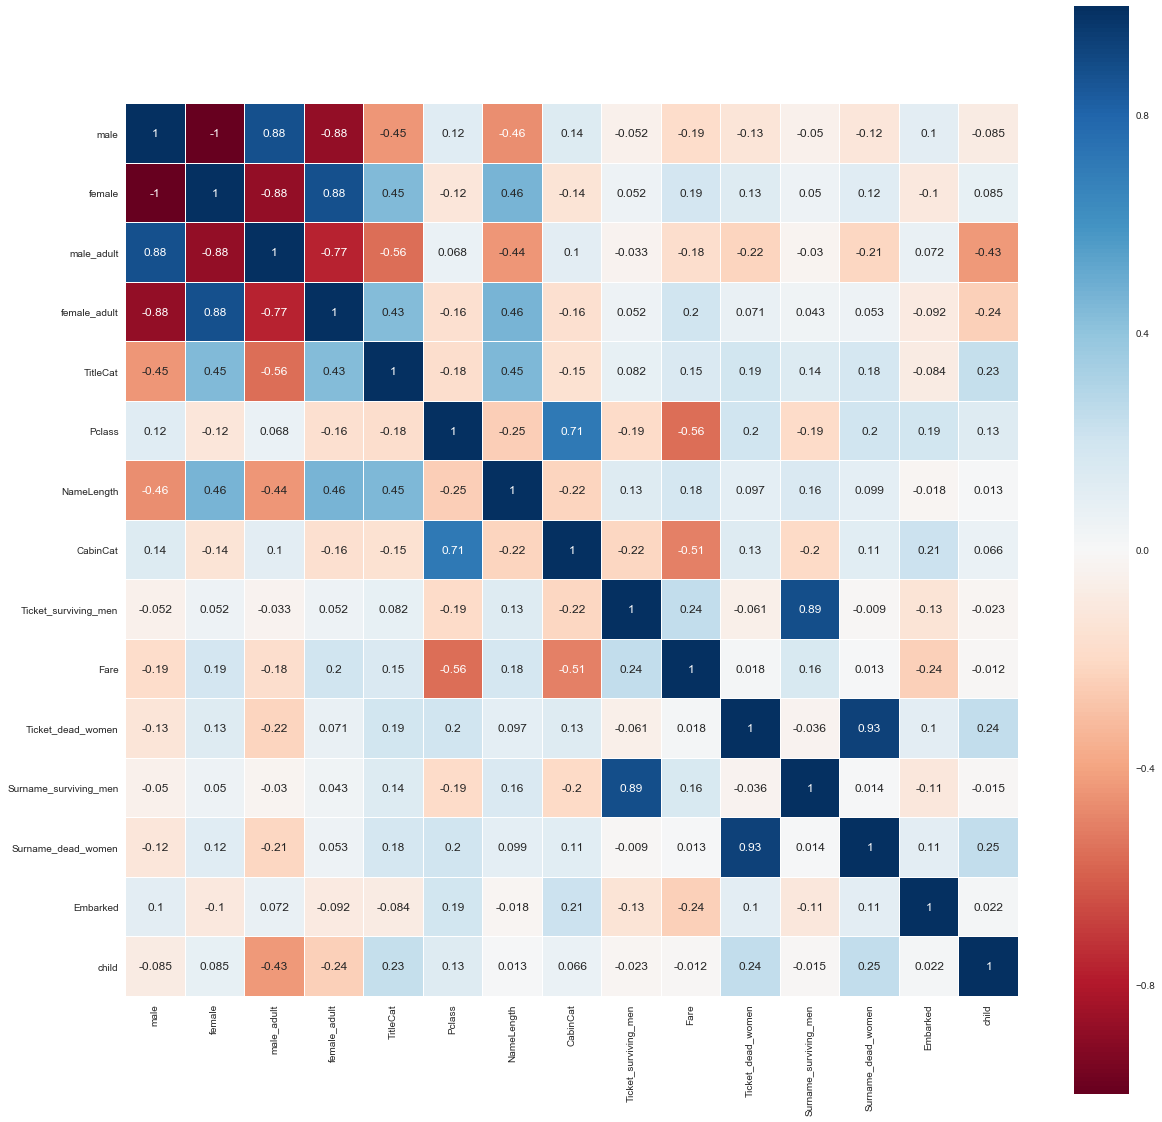

In [53]:
df_corr=df[features_selected].copy()
colormap=plt.cm.RdBu
plt.figure(figsize=(20,20))
#DataFrame.corr，返回本数据框成对列的相关性系数
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [54]:
type(df_corr)

pandas.core.frame.DataFrame

In [63]:
type(df_corr.corr)

method

特征之间相关性大于0.5的要去除。


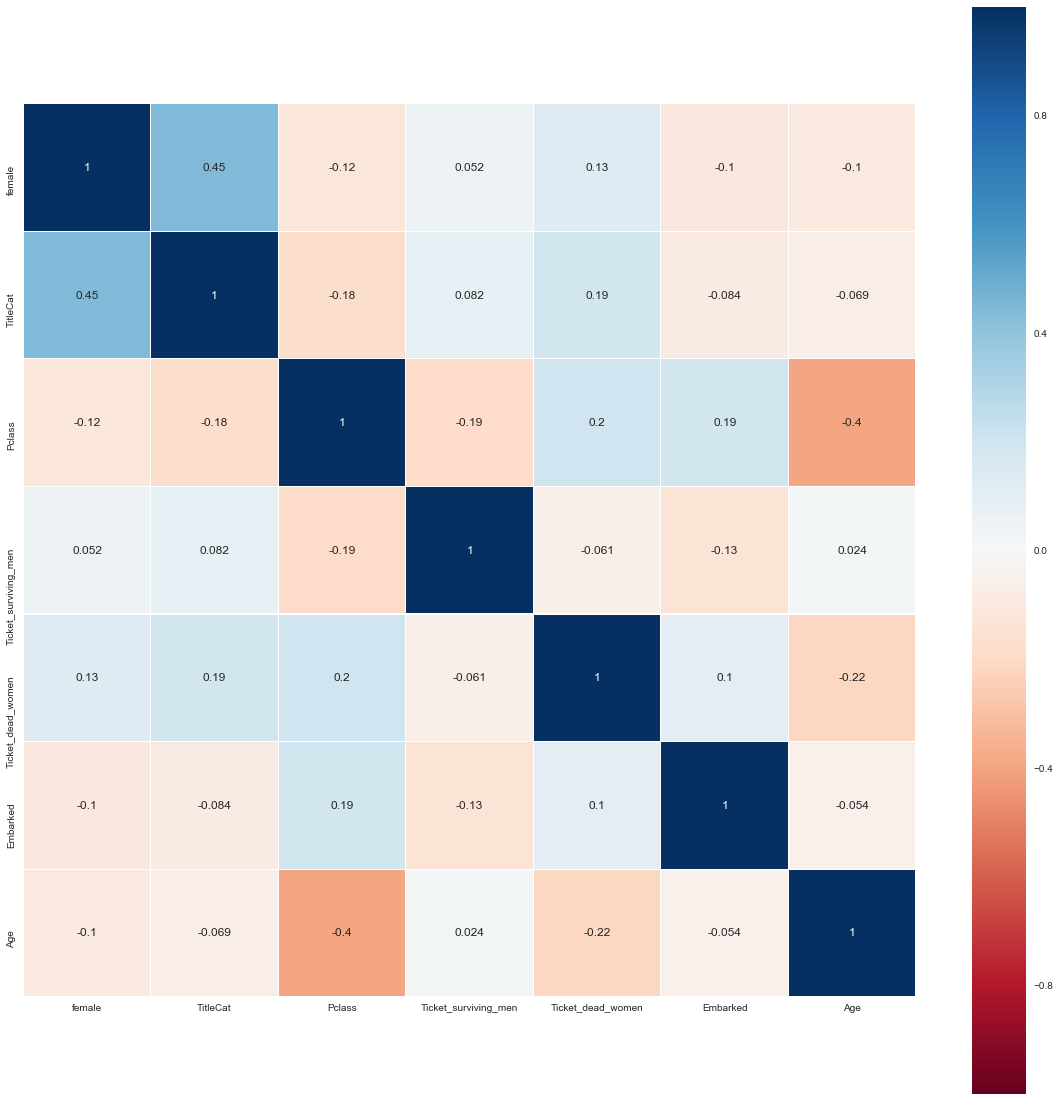

In [57]:
features_selected = [ 'female', 'TitleCat','Pclass','Ticket_surviving_men','CabinType',
                     'Ticket_dead_women','Embarked','Ticket_Numbers','FamilySize','Age']
df_corr = df[features_selected].copy()

colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))-
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

# 建模预测

创建模型

这明显是一个监督分类的问题（生还是死），可选择的模型算法也很多，这里采用了随机森林的模型。

In [ ]:
为了防止过拟合采用了K折交叉验证，集成学习等高级魔性有自带的特征打分方法，训练数据后我们可以通过feature_importances得到特征权
重的分数。

下面代码中的scores是交叉验证每次返回的评分数值

(891, 33)


In [66]:
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'RFC Cross Validation'))

Accuracy: 88.215 (+/- 0.73) [RFC Cross Validation]


score是对整个训练集的评分

In [68]:
rfc.fit(train[features_selected], target)
score = rfc.score(train[features_selected], target)
print("Accuracy: %0.3f            [%s]" % (score*100, 'RFC full test'))

Accuracy: 95.174            [RFC full test]


In [70]:
importances = rfc.feature_importances_
importances

array([0.15738854, 0.15861393, 0.07858428, 0.08041842, 0.04002041,
       0.14567976, 0.02423073, 0.05669677, 0.04730093, 0.21106623])

In [73]:
indices1 = np.argsort(importances)[::-1]
for a in range(len(features_selected)):
    print("%d. feature %d (%f) %s" % (a + 1, indices1[a]+1, importances[indices1[a]]*100, features_selected[indices1[a]]))

1. feature 10 (21.106623) Age
2. feature 2 (15.861393) TitleCat
3. feature 1 (15.738854) female
4. feature 6 (14.567976) Ticket_dead_women
5. feature 4 (8.041842) Ticket_surviving_men
6. feature 3 (7.858428) Pclass
7. feature 8 (5.669677) Ticket_Numbers
8. feature 9 (4.730093) FamilySize
9. feature 5 (4.002041) CabinType
10. feature 7 (2.423073) Embarked


In [76]:
#预测目标值
predictions = rfc.predict(test[features_selected])
predictions

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
print (train)